# Escuela-Congreso 100YQR: Protocolos de Información & Computación Cuántica Usando Fotones

---

## Sesión 3 Taller (01-10-2025)
### *Por Santiago Bustamante* ⚛

---

$\newcommand{\ket}[1]{| #1 \rangle}$
$\newcommand{\bra}[1]{\langle #1 |}$
$\newcommand{\braket}[2]{\langle #1 | #2 \rangle}$

## Pulsos Coherentes Débiles

En la óptica cuántica experimental es fundamental generar fotones individuales en el laboratorio. Sin embargo, esta no es una tarea sencilla. Una forma bastante astuta (y también barata) de construir una fuente de luz que es aproximadamente una fuente de fotones individuales es a través de la atenuación de luz coherente proveniente de una fuente láser. Una forma común de lograr esta atenuación es usando moduladores acusto-ópticos (AOMs por Acousto-Optic Modulators) que permiten modular de manera controlada las propiedades de la luz. Así, podemos usar AOMs para crear pulsos de luz coherente, cuyo estado cuántico puede escribirse en la base de Fock (es decir, de número de fotones) como

$$
\ket{\alpha} =  e^{-\frac{1}{2}|\alpha|^2 } \sum_{n=0}^\infty \frac{\alpha^n}{\sqrt{n!}} \ket{n},
$$

siendo $\alpha$ un número complejo que caracteriza por completo el vector de estado. La probabilidad de contar $n$ fotones en un pulso coherente $\ket{\alpha}$ que incide normalmente sobre un detector en un intervalo de tiempo fijo es

$$
P_\mu (n) = |\braket{n}{\alpha}|^2 = e^{-\mu}\frac{\mu^n}{n!},
$$

donde $\mu=|\alpha|^2$ es el número medio de fotones del pulso, i.e. $\mu=\sum_n n P_\mu(n)$. Esta es una distribución Poissoniana. Decimos que un pulso coherente es débil cuando $\mu\ll 1$.

> Ejercicio: calcule la probabilidad de contar exactamente un fotón ($n=1$) y la de contar más de un fotón ($n>1$) para dos pulsos coherentes distintos con $\mu=0.60$ y $\mu=0.18$. Grafique dos histogramas que representen estas distribuciones de probabilidad.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson

In [2]:
mu_a = 0.60
mu_b = 0.18

# the stats module from the scipy library allows us to calculate these probabilities very straightforwardly

print("Numero medio de fotones (mu):\t\t\t0.600\t0.180")
print("Probabilidad de contar un solo fotón: \t\t{:.3f}\t{:.3f}".format(poisson.pmf(1, mu_a), poisson.pmf(1, mu_b)))
print("Probabilidad de contar más de un fotón: \t{:.3f}\t{:.3f}".format(1-poisson.cdf(1, mu_a), 1-poisson.cdf(1, mu_b)))

Numero medio de fotones (mu):			0.600	0.180
Probabilidad de contar un solo fotón: 		0.329	0.150
Probabilidad de contar más de un fotón: 	0.122	0.014


In [3]:
n_range = np.arange(9)

pmf_a = poisson.pmf(n_range, mu_a)
pmf_b = poisson.pmf(n_range, mu_b)

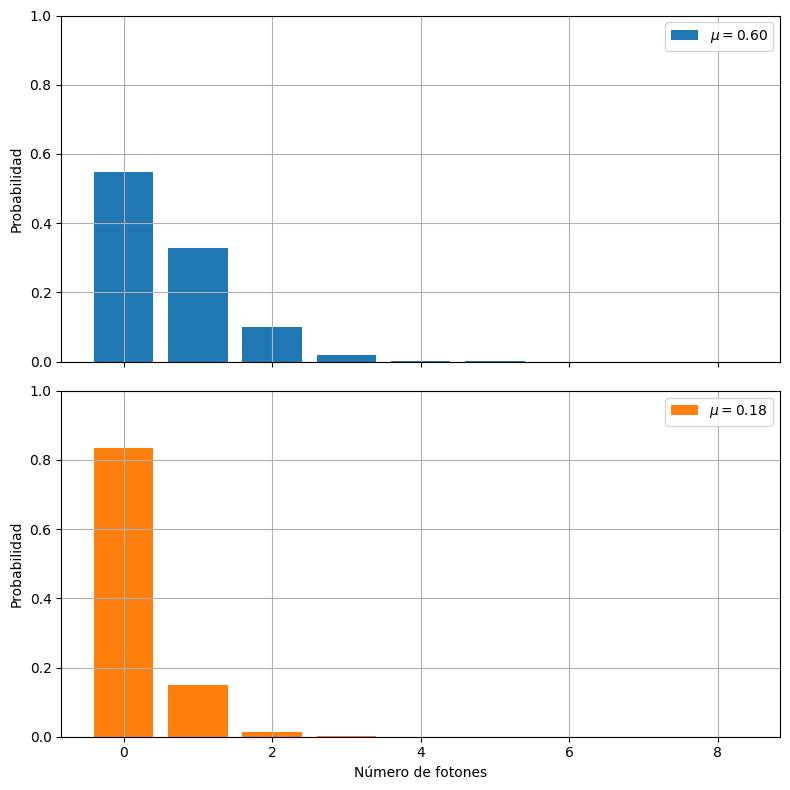

In [4]:
fig, ax = plt.subplots(2, 1, figsize=(8,8), sharex=True)

ax[0].bar(n_range, pmf_a, label=r"$\mu={:.2f}$".format(mu_a), alpha=1, color="C0")
ax[0].grid()
ax[0].set_ylabel("Probabilidad")
ax[0].set_ylim(0, 1)
ax[0].legend()

ax[1].bar(n_range, pmf_b, label=r"$\mu={:.2f}$".format(mu_b), alpha=1, color="C1")
ax[1].grid()
ax[1].set_ylabel("Probabilidad")
ax[1].set_ylim(0, 1)
ax[1].set_xlabel("Número de fotones")
ax[1].legend()

fig.tight_layout()
plt.show()

## Escenario de preparación y medida

En un escenario de preparación y medida en el contexto de las comunicaciones cuánticas, dos partes (Alice y Bob) comparten un canal cuántico autenticado y buscan comunicarse a través de él. Para nuestros propósitos, podemos suponer que a través de este canal Alice puede enviarle qudits (sistemas cuánticos con un espacio de Hilbert $\mathcal{H}=\mathbb{C}^d$) a Bob. Así, para comunicarse con Bob, ella prepara un estado $\ket{\varphi^{(\alpha)}_j}$ perteneciente a una base ortonormal $B_\alpha$ que hace parte de un conjunto de MUBs , y le envía este qudit a Bob. Bob, al otro extremo del canal, recibe el qudit en un estado no necesariamente puro $\mathcal{E}(\ket{\varphi^{(\alpha)}_j}\bra{\varphi^{(\alpha)}_j})$, donde $\mathcal{E}$ representa el efecto del canal, e.g. el efecto de ruido o de la presencia de un espía. Finalmente, Bob mide el qudit en una base ortonormal $B_\beta$ del mismo conjunto de MUBs y adquiere una cierta cantidad de información acerca de la preparación del estado hecha por Alice.

Este escenario es el más básico para la comunicación cuántica y se utiliza especialmente en protocolos criptográficos como la distribución cuántica de llaves, donde ambas partes usan el canal cuántico para generar una llave secreta común que les permite luego encriptar mensajes con un nivel de seguridad imposible de obtener de forma clásica.

## Qudits espaciales

En el artículo [https://arxiv.org/abs/1308.0019v1], los autores realizan experimentalmente un protocolo automatizado de distribución cuántica de llaves usando qudits con $d=16$ en un escenario de preparación y medida. Para esto, usan fotones individuales (logrados de manera aproximada con pulsos coherentes débiles) y realizan un sistema cuántico 16-dimensional a través de la modulación espacial compleja de los campos ópticos asociados a estos fotones. Así, construyen una base computacional $\{\ket{l}\}$ donde $\ket{l}$ representa el estado de un fotón que sale por la $l$-ésima rendija de una rejilla de difracción implementada a través de un modulador espacial de luz (SLM de Spatial Light Modulator). A este sistema cuántico le llaman un qudit espacial.

Así, con ayuda de otro SLM y un sistema de formación de imagen, los autores logran preparar de forma controlada y automatizada diferentes estados (i.e., diferentes perfiles de amplitud y fase de los campos ópticos de los fotones individuales) pertenecientes a dos MUBs $B_\alpha$ y $B_{\alpha'}$ diferentes. Luego, hacen mediciones proyectivas incompletas en estados particulares de las MUBs, utilizando, primero, un sistema de formación de imagen y un SLM, cuyo efecto es el de multiplicar los perfiles espaciales del estado preparado $\ket{\psi_\text{p}}$ y el estado medido $\ket{\psi_\text{m}}$, y luego, un sistema 2f cuyo efecto neto es el de realizar físicamente una transformada de Fourier bidimensional al producto de la multiplicación. Si a esta transformada de Fourier bidimensional le llamamos $F(x,y)$, siendo $x$ e $y$ las coordenadas transversales al eje de propagación de la luz en el plano focal de la lente del sistema 2f, entonces es posible demostrar que

$$
|\braket{\psi_\text{p}}{\psi_\text{m}}|^2 \propto F(0,0),
$$

es decir, que la intensidad de la luz en el centro del plano focal del sistema es proporcional a la probabilidad de obtener el estado $\ket{\psi_\text{m}}$ al medir el estado preparado $\ket{\psi_\text{p}}$.

> Ejercicio: Simule numéricamente el escenario de preparación y medida en el contexto del artículo anteriormente mencionado usando las mismas MUBs que usan los autores.

In [5]:
import sys
!git clone https://github.com/santiagobusta/PyOptics.git
sys.path.append('PyOptics')

import PyOptics as opt

Cloning into 'PyOptics'...
remote: Enumerating objects: 180, done.
remote: Counting objects: 100% (16/16), done.
remote: Compressing objects: 100% (13/13), done.
remote: Total 180 (delta 4), reused 9 (delta 3), pack-reused 164 (from 1)
Receiving objects: 100% (180/180), 20.93 MiB | 11.88 MiB/s, done.
Resolving deltas: 100% (93/93), done.


In [6]:
N = 1024 # linear length of simulation plane in pixels
shape = (N,N) # shape of simulation plane in pixels

D = 16 # number of slits (dimension of the qudit)
s_width = 16 # slit width in pixels
s_height = 512 # slit height in pixels
s_spacing = s_width*2 # spacing between slits in pixels


input_signal = np.zeros(shape, dtype="complex")

for i in range(D):
  input_signal += opt.proc2d.Rect(s_width, s_height, shape, x=512+(i+1/2-D/2)*s_spacing, y = 512, use_pxc=True)


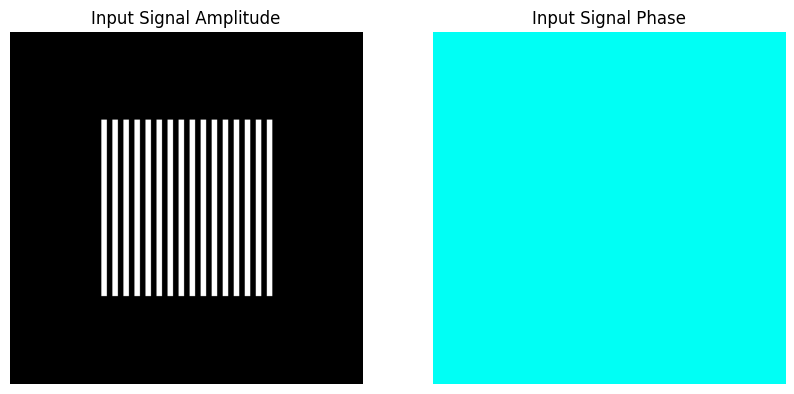

In [7]:
fig, ax = plt.subplots(1 , 2, figsize=(10,6))

ax[0].imshow(np.abs(input_signal), cmap="gray", vmin=0., vmax=1.)
ax[0].set_title("Input Signal Amplitude")
ax[0].axis("off")

ax[1].imshow(np.angle(input_signal), cmap="hsv", vmin = -np.pi, vmax=np.pi)
ax[1].set_title("Input Signal Phase")
ax[1].axis("off")

plt.show()

In [8]:
# introducing the two MUBs from the first session

U1 = np.array([[1,-1, 1, 1,-1, 1,-1, 1,-1, 1, 1, 1, 1, 1,-1,-1],
              [-1, 1, 1, 1,-1, 1, 1,-1, 1, 1,-1,-1, 1, 1, 1,-1],
              [ 1, 1, 1,-1, 1,-1, 1, 1,-1, 1,-1, 1, 1,-1, 1,-1],
              [ 1, 1,-1, 1, 1, 1, 1,-1, 1,-1, 1, 1, 1,-1,-1,-1],
              [-1,-1, 1, 1, 1,-1, 1, 1, 1,-1, 1, 1,-1, 1, 1,-1],
              [ 1, 1,-1, 1,-1, 1, 1, 1,-1,-1,-1, 1,-1, 1, 1, 1],
              [-1, 1, 1, 1, 1, 1, 1, 1,-1, 1, 1,-1,-1,-1,-1, 1],
              [ 1,-1, 1,-1, 1, 1, 1, 1, 1,-1,-1,-1, 1, 1,-1, 1],
              [-1, 1,-1, 1, 1,-1,-1, 1, 1, 1,-1, 1, 1, 1,-1, 1],
              [ 1, 1, 1,-1,-1,-1, 1,-1, 1, 1, 1, 1,-1, 1,-1, 1],
              [ 1,-1,-1, 1, 1,-1, 1,-1,-1, 1, 1,-1, 1, 1, 1, 1],
              [ 1,-1, 1, 1, 1, 1,-1,-1, 1, 1,-1, 1,-1,-1, 1, 1],
              [ 1, 1, 1, 1,-1,-1,-1, 1, 1,-1, 1,-1, 1,-1, 1, 1],
              [ 1, 1,-1,-1, 1, 1,-1, 1, 1, 1, 1,-1,-1, 1, 1,-1],
              [-1, 1, 1,-1, 1, 1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1],
              [-1,-1,-1,-1,-1, 1, 1, 1, 1, 1, 1, 1, 1,-1, 1, 1]])/np.sqrt(16)

U2 = np.array([[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
              [ 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1],
              [ 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1],
              [ 1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1],
              [ 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1],
              [ 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1],
              [ 1,-1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1],
              [ 1, 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1],
              [ 1,-1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1],
              [ 1, 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1],
              [ 1,-1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1],
              [ 1,-1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1],
              [ 1,-1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1],
              [ 1,-1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1],
              [ 1, 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1],
              [ 1, 1, 1,-1, 1, 1,-1,-1, 1,-1, 1,-1,-1,-1,-1, 1]])/np.sqrt(16)

basis = {
    "0" : U1,
    "1" : U2
}

# prepare function: prepares signal corresponding to state #state_no from MUB #basis_no
def prepare(basis_no, state_no):

  signal = np.zeros(shape, dtype="complex")

  U = basis[basis_no]

  for i in range(D):
    signal += U[i,state_no]*opt.proc2d.Rect(s_width, s_height, shape, x=512+(i+1/2-D/2)*s_spacing, y = 512, use_pxc=True)/np.sqrt(s_width*s_height)

  return signal

# measure signal in state #state_no from MUB #basis_no
def measure(signal, basis_no, state_no):

  U = basis[basis_no]

  measuring_signal = prepare(basis_no, state_no)*np.sqrt(16*s_width*s_height) # this is renormalized because it physically corresponds to a transmitivity function

  signal = signal*measuring_signal

  return opt.proc2d.FFT2(signal, dx=1./1024, dy=1./1024)

In [9]:
prepared_basis = "0"; prepared_state = 3
measuring_basis = "0"; measuring_state = 3

prepared_signal = prepare(prepared_basis, prepared_state)

measuring_signal = prepare(measuring_basis, measuring_state)

outcome_signal = measure(prepared_signal, measuring_basis, measuring_state)

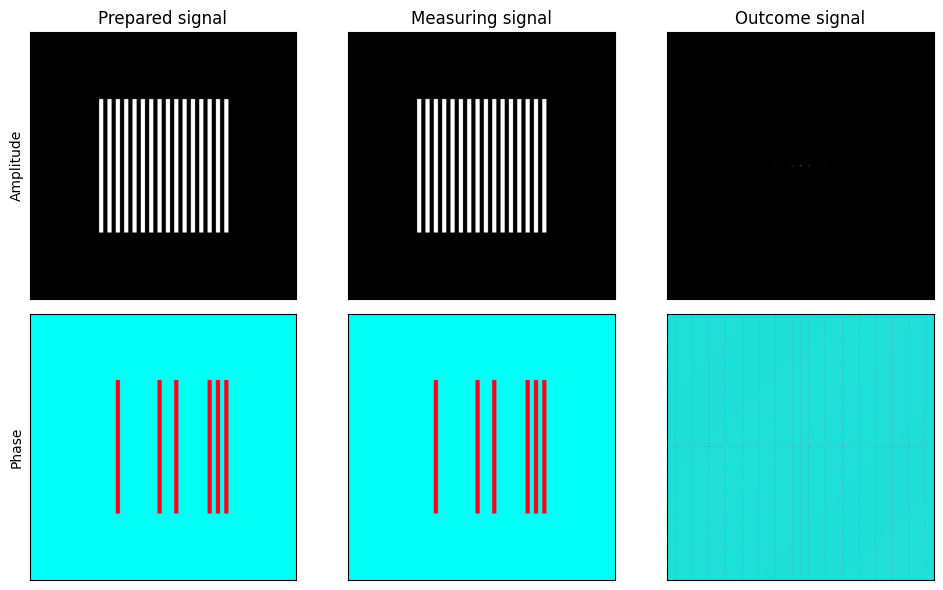

In [10]:
fig, ax = plt.subplots(2 , 3, figsize=(10,6))

signal_list = [prepared_signal, measuring_signal, outcome_signal]
titles = ["Prepared signal", "Measuring signal", "Outcome signal"]

for i in range(3):
  ax[0,i].imshow(np.abs(signal_list[i]), cmap="gray")
  ax[0,i].set_title(titles[i])
  ax[0,i].set_ylabel("Amplitude" if i==0 else "")

  ax[1,i].imshow(np.angle(signal_list[i]), cmap="hsv", vmin = -np.pi, vmax=np.pi)
  ax[1,i].set_ylabel("Phase" if i==0 else "")

  ax[0,i].set_xticks([])
  ax[0,i].set_yticks([])
  ax[1,i].set_xticks([])
  ax[1,i].set_yticks([])

plt.tight_layout()
plt.show()

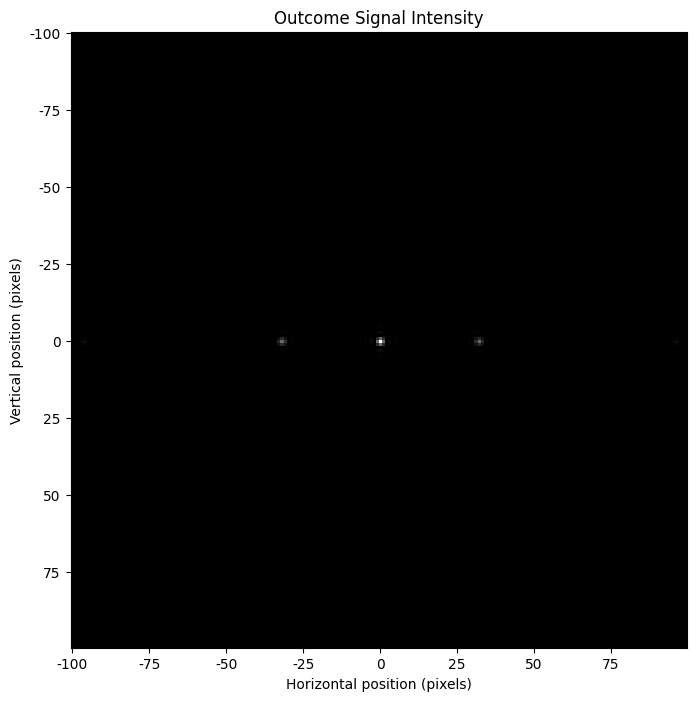

In [11]:
plt.figure(figsize=(8,8))
plt.imshow(np.abs(outcome_signal)[412:612,412:612]**2, cmap="gray")
plt.title("Outcome Signal Intensity")
plt.xlabel("Horizontal position (pixels)")
plt.yticks(np.arange(0,200,25),np.arange(412,612,25)-512)
plt.xticks(np.arange(0,200,25),np.arange(412,612,25)-512)
plt.ylabel("Vertical position (pixels)")
plt.show()

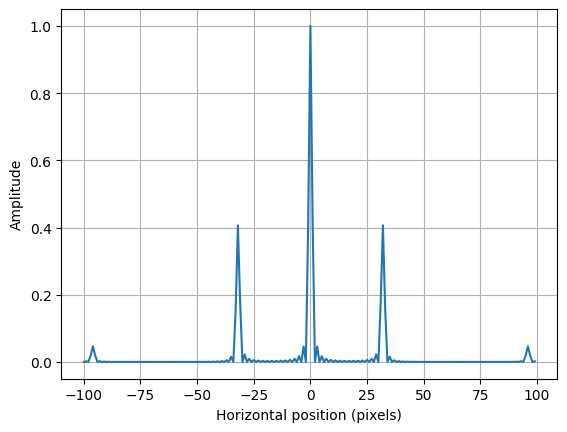

In [12]:
intensity_1dprofile = np.sum(np.abs(outcome_signal)**2,axis=0)
intensity_1dprofile = intensity_1dprofile*4 # not sure yet why but multiplying by 4 here leads to correctly normalized probability

plt.figure()
plt.plot(np.arange(412,612)-512, intensity_1dprofile[412:612])
plt.xlabel("Horizontal position (pixels)")
plt.ylabel("Amplitude")
plt.grid()
plt.show()

In [13]:
print("The outcome probability is equal to {:.4f}".format(intensity_1dprofile[512]))

The outcome probability is equal to 1.0000
